In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import math as m
import numpy as np
import random
import copy

In [2]:
def makeagents(N, money):
    agents = np.zeros(N)
    for i in range(len(agents)):
        agents[i] = money
    return agents

In [3]:
def transactions(agent_array, tr_num):
    people = copy.copy(agent_array)
    total_money_begin = sum(agent_array)
    current = 1
    while current <= tr_num:
        i = random.randint(0,len(agent_array)-1)
        j = random.randint(0,len(agent_array)-1)
        m_i = people[i]
        m_j = people[j]
        total_m = m_i + m_j
        epsilon = random.uniform(0,1)
        current += 1
        if people[i]>0 and people[j]>0:
            people[i] = epsilon*total_m
            people[j] = (1-epsilon)*total_m
        else:
            continue
        
    total_money_end = sum(people)
    #print(total_money_begin, total_money_end)
    
    return people

In [4]:
def avg_money(array):
    length = len(array)
    average = 0
    for i in array:
        average += i/length
    return round(average,2)

In [5]:
def avg_money_sq(array):
    length = len(array)
    average = 0
    for i in array:
        average += i**2/length
    return round(average,2)

def variance(array):
    return (avg_money_sq(array)-(avg_money(array))**2)**(1/2)

1500.8299999999999

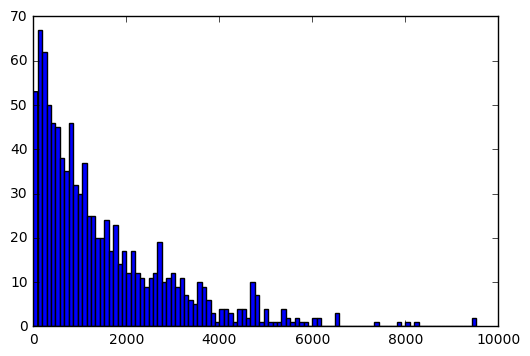

In [48]:
trial_1 = transactions(makeagents(1000,1500),100000)
plt.hist(trial_1,bins=100)
avg_money(trial_1)

9004.8600000000006

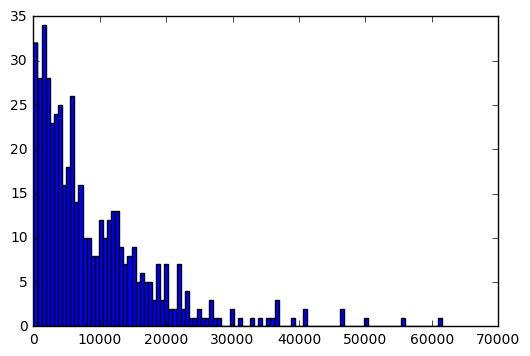

In [7]:
trial_2 = transactions(makeagents(500,10000),1000000)
plt.hist(trial_2 ,bins=100)
avg_money(trial_2)

406.69999999999999

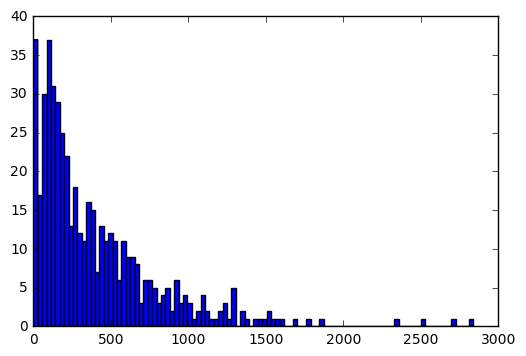

In [8]:
trial_3 = transactions(makeagents(500,420),1000000)
plt.hist(trial_3 ,bins=100)
avg_money(trial_3)

In [9]:
def distribution_exp(array):
    avg = avg_money(array)
    beta = 1/avg
    mon = np.linspace(0,max(array))
    wn = []
    for i in mon:
        wn.append(beta*m.exp(-beta*i))
    h = plt.plot(mon, wn, lw=2)
    
    plt.xlabel("Amount of Money that The Individual Possesses")
    plt.ylabel("Wealth (1/Money)")
    plt.title("Distribution of Wealth")
    
    plt.show()

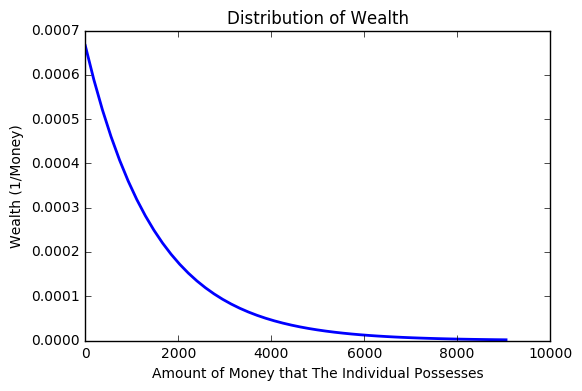

In [10]:
distribution_exp(trial_1)

In [11]:
def distribution_log(array):
    avg = avg_money(array)
    beta = 1/avg
    mon = np.linspace(0,max(array))
    wn = []
    for i in mon:
        wn.append(m.log(beta*m.exp(-beta*i)))
    h = plt.plot(mon, wn, lw=2)
    
    plt.xlabel("Amount of Money that The Individual Possesses")
    plt.ylabel("Log of Wealth (1/Money)")
    plt.title("Distribution of Wealth")
    
    plt.show()

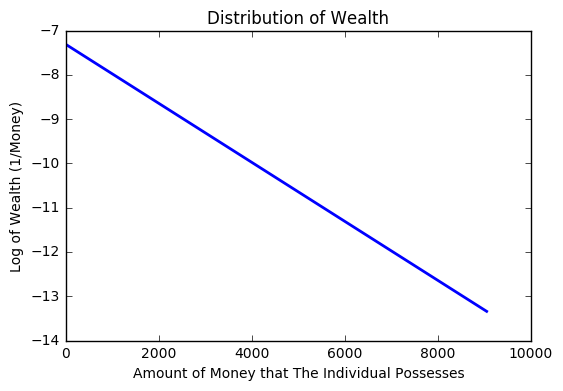

In [12]:
distribution_log(trial_1)

In [13]:
def overlay_exp(array):
    avg = avg_money(array)
    beta = 1/avg
    
    fig = plt.figure(figsize=(5,5))
    ax  = fig.add_subplot(111)
    
    # now plot
    data= array
    counts, bins, bars = ax.hist(data, bins=100)
    mon = np.linspace(0,max(array))
    wn = []
    for i in mon:
        wn.append(max(counts)*m.exp(-beta*i))
    h = ax.plot(mon, wn, lw=2, color='r')
    
    #Nice-ness
    plt.xlabel("Amount of Money that The Individual Possesses")
    plt.ylabel("Counts of Histogram")
    plt.title("Distribution of Wealth")
    
    # show
    plt.show()

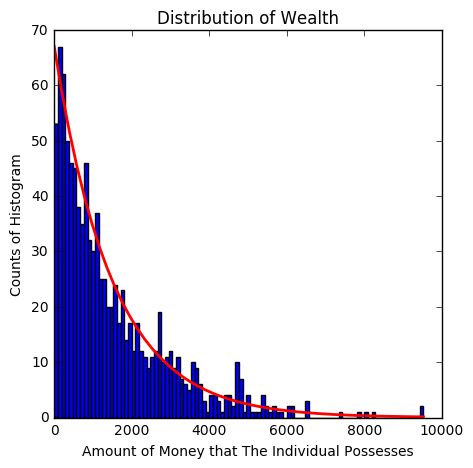

In [49]:
overlay_exp(trial_1)

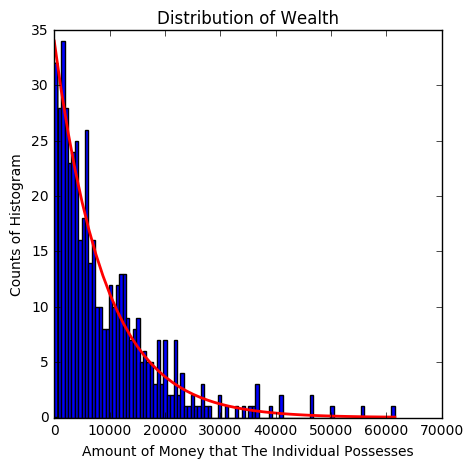

In [15]:
overlay_exp(trial_2)

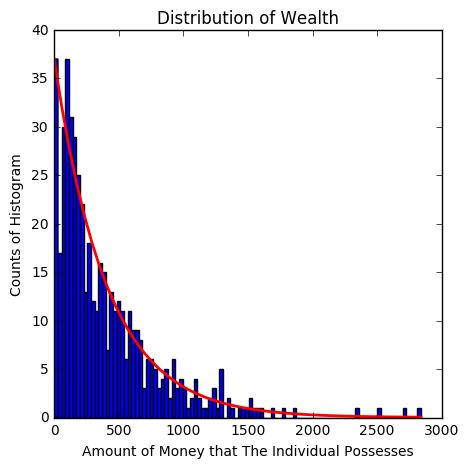

In [16]:
overlay_exp(trial_3)

In [3]:
def trans_eq(agent_array, tr_num):
    people = copy.copy(agent_array)
    current = 1
    averages = [np.average(people)]
    while current <= tr_num:
        averages.append(np.average(people))
        i = random.randint(0,len(agent_array)-1)
        j = random.randint(0,len(agent_array)-1)
        m_i = people[i]
        m_j = people[j]
        total_m = m_i + m_j
        epsilon = random.uniform(0,1)
        current += 1
        if people[i]>0 and people[j]>0:
            people[i] = epsilon*total_m
            people[j] = (1-epsilon)*total_m
        else:
            continue
        
    #print(total_money_begin, total_money_end)
    
    return averages

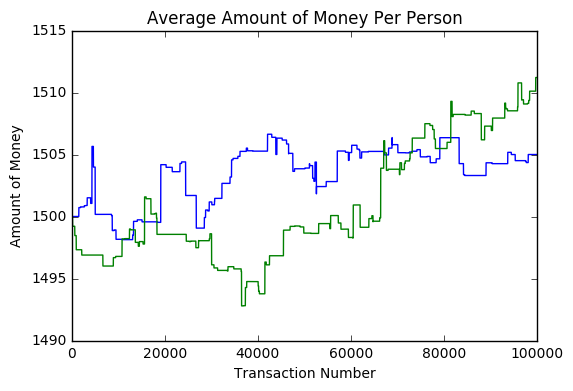

In [8]:
plt.plot(trans_eq(makeagents(1000,1500),100000)) #trial 1
plt.title("Average Amount of Money Per Person")
plt.ylabel("Amount of Money")
plt.xlabel("Transaction Number")

plt.plot(trans_eq(makeagents(1000,1500),100000)) #trial 1
plt.title("Average Amount of Money Per Person")
plt.ylabel("Amount of Money")
plt.xlabel("Transaction Number")

In [17]:
def trans_save(agent_array, tr_num, lmbda):
    people = copy.copy(agent_array)
    #total_money_begin = sum(agent_array)
    current = 0
    while current <= tr_num:
        i = random.randint(0,len(agent_array)-1)
        j = random.randint(0,len(agent_array)-1)
        m_i = people[i]
        m_j = people[j]
        total_m = m_i + m_j
        current += 1
        epsilon = random.uniform(0,1)
        if people[i]>0 and people[j]>0:
            dm = (1-lmbda)*(epsilon*m_j-(1-epsilon)*m_i)
            people[i] = m_i+dm
            people[j] = m_j-dm
        else:
            continue
        
    #total_money_end = sum(people)
    #print(total_money_begin, total_money_end)
    
    return people

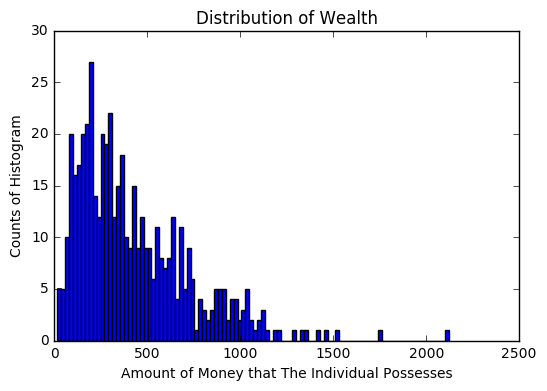

In [18]:
trial_4 = trans_save(makeagents(500,420),1000000, 0.25)
plt.hist(trial_4, bins=100)
plt.xlabel("Amount of Money that The Individual Possesses")
plt.ylabel("Counts of Histogram")
plt.title("Distribution of Wealth")

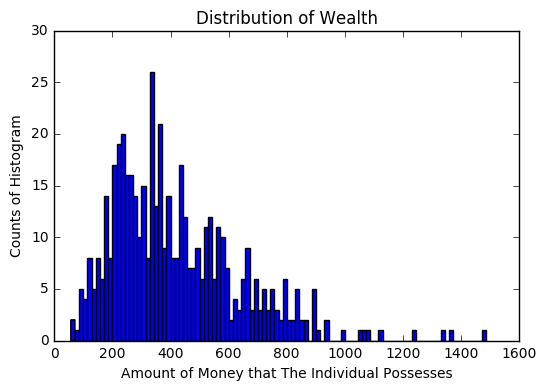

In [19]:
trial_5 = trans_save(makeagents(500,420),1000000, 0.5)
plt.hist(trial_5, bins=100)
plt.xlabel("Amount of Money that The Individual Possesses")
plt.ylabel("Counts of Histogram")
plt.title("Distribution of Wealth")

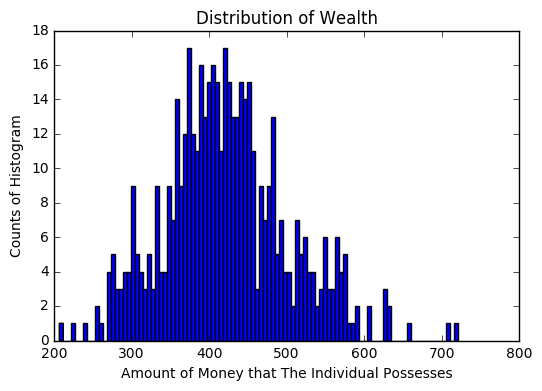

In [20]:
trial_6 = trans_save(makeagents(500,420),1000000, 0.9)
plt.hist(trial_6, bins=100)
plt.xlabel("Amount of Money that The Individual Possesses")
plt.ylabel("Counts of Histogram")
plt.title("Distribution of Wealth")

In [21]:
def overlay_gauss(array):
    avg = avg_money(array)
    sigma = variance(array)
    
    fig = plt.figure(figsize=(5,5))
    ax  = fig.add_subplot(111)
    
    # now plot
    data= array
    counts, bins, bars = ax.hist(data, bins=100, normed=True)
    mon = np.linspace(0,max(array))
    h = ax.plot(mon, mlab.normpdf(mon, avg, sigma), lw=2, color='r')
    
    #Nice-ness
    plt.xlabel("Amount of Money that The Individual Possesses")
    plt.ylabel("Counts of Histogram")
    plt.title("Distribution of Wealth")
    
    # show
    plt.show()

In [22]:
avg_money(trial_4)

427.42000000000002

In [23]:
avg_money_sq(trial_4)

275346.82000000001

In [24]:
variance(trial_4)

304.39934888235223

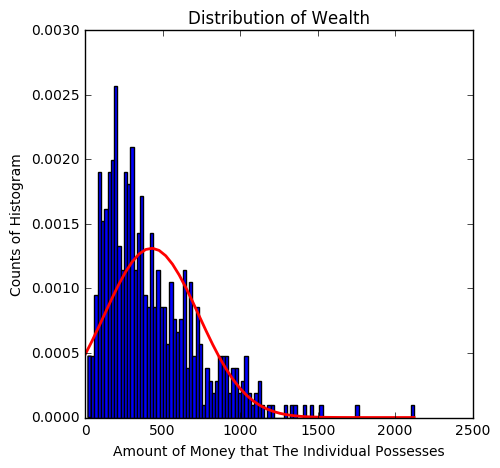

In [25]:
 overlay_gauss(trial_4)

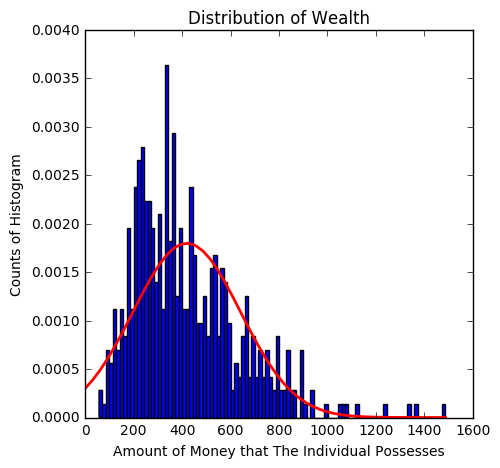

In [26]:
 overlay_gauss(trial_5)

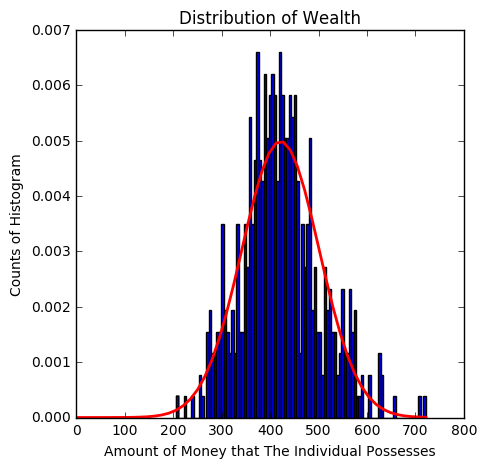

In [27]:
 overlay_gauss(trial_6)

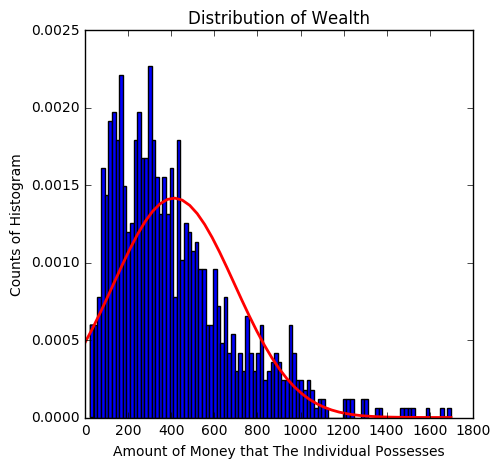

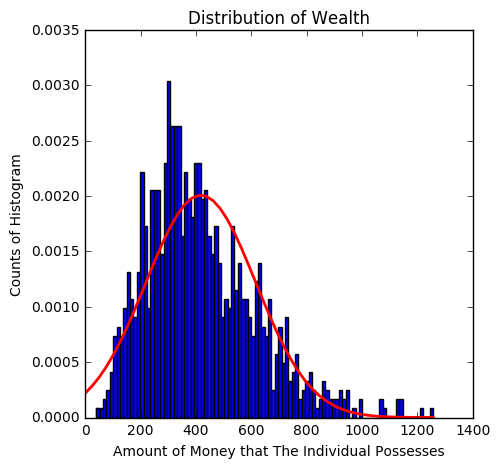

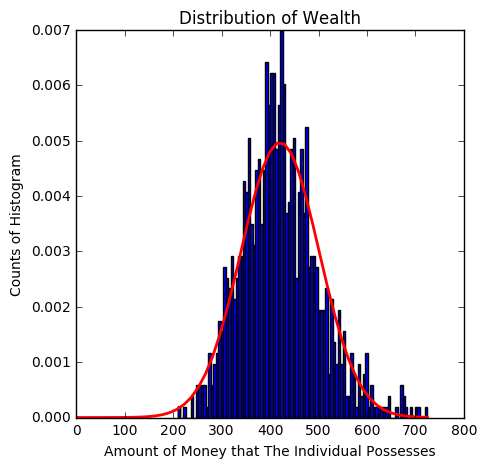

In [56]:
trial_4_2 = trans_save(makeagents(1000,420),1000000, 0.25)
trial_5_2 = trans_save(makeagents(1000,420),1000000, 0.5)
trial_6_2 = trans_save(makeagents(1000,420),1000000, 0.9)
overlay_gauss(trial_4_2)
overlay_gauss(trial_5_2)
overlay_gauss(trial_6_2)

In [28]:
def agents_diff(N, money):
    agents = np.zeros(N)
    for i in range(len(agents)):
        agents[i] = random.randint(0,money)
    return agents

def tr_nearest(agent_array, tr_num,a):
    people = copy.copy(agent_array)
    current = 1
    while current <= tr_num:
        i,j = random.sample(range(0, len(agent_array)-1),2)
        #print(i,j)
        m_i = people[i]
        m_j = people[j]
        #print(m_i,m_j)
        total_m = m_i + m_j
        diff = m_i-m_j
        if diff==0:
            diff = 1
        abs_diff = abs(diff)
        prob = 1/(abs_diff**(a))
        user_set = random.uniform(0,1)
        #print(prob)
        current += 1
        if prob>=user_set:
            epsilon = random.uniform(0,1)
            if people[i]>0 and people[j]>0:
                people[i] = epsilon*total_m
                people[j] = (1-epsilon)*total_m
            else:
                continue
        else:
            continue
        
    #print(total_money_begin, total_money_end)
    
    return people

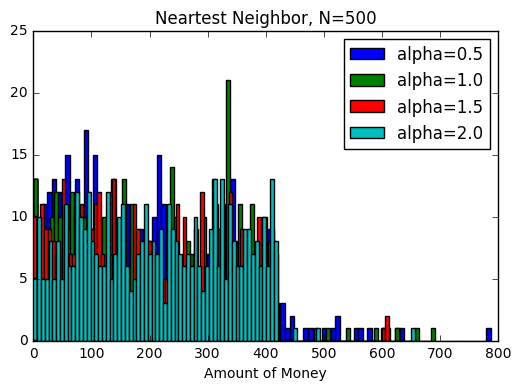

In [29]:
trial_7 = tr_nearest(agents_diff(500,420),1000, 0.5)
trial_8 = tr_nearest(agents_diff(500,420),1000, 1.0)
trial_9 = tr_nearest(agents_diff(500,420),1000, 1.5)
trial_10 = tr_nearest(agents_diff(500,420),1000, 2.0)
#trial_11 = tr_nearest(agents_diff(500,420),1000,0.7, 0)
plt.hist(trial_7, bins=100, label='alpha=0.5')
plt.hist(trial_8, bins=100, label='alpha=1.0')
plt.hist(trial_9, bins=100, label='alpha=1.5')
plt.hist(trial_10, bins=100, label='alpha=2.0')
#plt.hist(trial_11, bins=100, label='alpha=0')
plt.legend(loc="upper right")
plt.title("Neartest Neighbor, N=500")
plt.xlabel("Amount of Money")

(array([ 28.,  19.,  24.,  13.,  25.,  14.,  16.,  11.,  14.,  21.,  16.,
         13.,  15.,  11.,  14.,  14.,  11.,  14.,  12.,  12.,   7.,  12.,
          6.,  11.,   6.,   1.,   7.,  11.,   8.,   5.,   5.,   8.,   1.,
          5.,   7.,   4.,   8.,   3.,   2.,   8.,   4.,   2.,   2.,   2.,
          7.,   0.,   3.,   2.,   2.,   2.,   0.,   4.,   0.,   1.,   1.,
          1.,   3.,   2.,   0.,   2.,   2.,   0.,   0.,   2.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   2.,   1.,   1.,   1.,   0.,   0.,
          0.,   1.,   2.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([  1.05090928e-01,   1.13051987e+01,   2.25053064e+01,
          3.37054141e+01,   4.49055219e+01,   5.61056296e+01,
          6.73057373e+01,   7.85058451e+01,   8.97059528e+01,
          1.00906061e+02,   1.12106168e+02,   1.23306276e+02,
          1.34506384e+02,   1.45706491e+02,   1.56906599e+02,
         

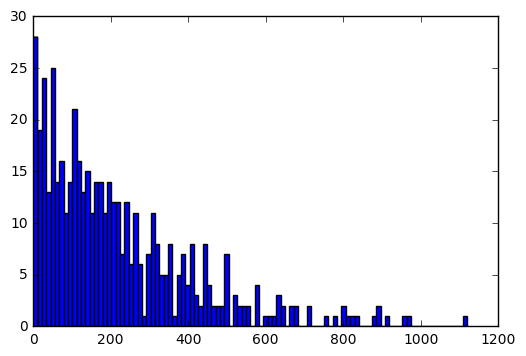

In [30]:
trial_check_1 = tr_nearest(agents_diff(500,420),1000, 0)
plt.hist(trial_check_1, bins=100, label='alpha=0')

(array([  6.,   8.,   7.,   4.,   7.,   4.,  11.,   9.,   5.,   5.,   5.,
          2.,   9.,   3.,   5.,   4.,   6.,   9.,   4.,   5.,   8.,   8.,
          7.,   7.,   6.,   4.,   7.,   4.,   5.,   3.,   6.,   6.,   9.,
          2.,   8.,   9.,   9.,   6.,   6.,   6.,   8.,   5.,   7.,   5.,
          6.,   8.,   2.,   3.,  11.,   3.,   5.,   4.,   8.,   8.,   4.,
          6.,   6.,   8.,   7.,   5.,   5.,   7.,   7.,   6.,   2.,   7.,
          5.,   7.,   8.,   4.,   5.,   7.,   6.,   3.,   6.,   4.,   6.,
          8.,   6.,   8.,   6.,   5.,   8.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   1.        ,    6.06012248,   11.12024495,   16.18036743,
          21.24048991,   26.30061238,   31.36073486,   36.42085733,
          41.48097981,   46.54110229,   51.60122476,   56.66134724,
          61.72146972,   66.78159219,   71.84171467,   76.90183714,
          81.96195962,   87.0220821 ,   92.082

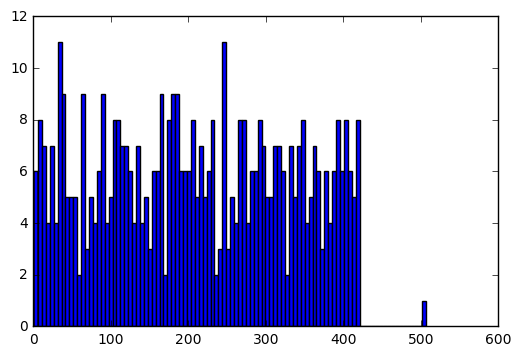

In [31]:
trial_check_max = tr_nearest(agents_diff(500,420),1000, 10)
plt.hist(trial_check_max, bins=100, label='alpha=0')

In [32]:
def tr_nearest_save(agent_array, tr_num,lmbda, a):
    people = copy.copy(agent_array)
    current = 1
    while current <= tr_num:
        i,j = random.sample(range(0, len(agent_array)-1),2)
        #print(i,j)
        m_i = people[i]
        m_j = people[j]
        #print(m_i,m_j)
        total_m = m_i + m_j
        diff = m_i-m_j
        if diff==0:
            diff = 1
        abs_diff = abs(diff)
        prob = 1/(abs_diff**(a))
        user_set = random.uniform(0,1)
        #print(prob)
        current += 1
        if prob>=user_set:
            epsilon = random.uniform(0,1)
            if people[i]>0 and people[j]>0:
                dm = (1-lmbda)*(epsilon*m_j-(1-epsilon)*m_i)
                people[i] = m_i+dm
                people[j] = m_j-dm
            else:
                continue
        else:
            continue
    #print(total_money_begin, total_money_end)
    
    return people

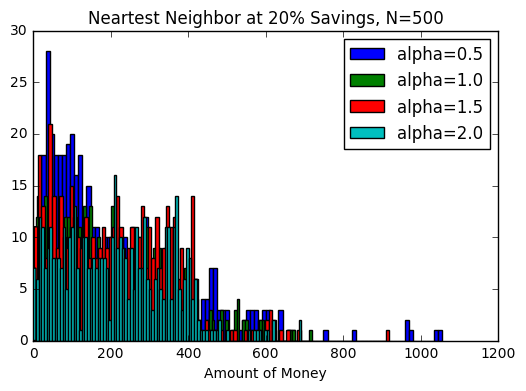

In [33]:
trial_12 = tr_nearest_save(agents_diff(500,420),10000,0.2,0.5)
trial_13 = tr_nearest_save(agents_diff(500,420),10000,0.2,1.0)
trial_14 = tr_nearest_save(agents_diff(500,420),10000,0.2,1.5)
trial_15 = tr_nearest_save(agents_diff(500,420),10000,0.2,2.0)
plt.hist(trial_12, bins=100, label='alpha=0.5')
plt.hist(trial_13, bins=100, label='alpha=1.0')
plt.hist(trial_14, bins=100, label='alpha=1.5')
plt.hist(trial_15, bins=100, label='alpha=2.0')
plt.legend(loc='upper right')
plt.title("Neartest Neighbor at 20% Savings, N=500")
plt.xlabel("Amount of Money")

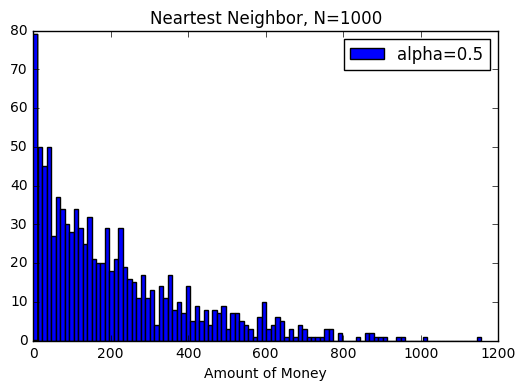

In [34]:
trial_16 = tr_nearest(agents_diff(1000,420),10000, 0.5)
trial_17 = tr_nearest(agents_diff(1000,420),10000, 1.0)
trial_18 = tr_nearest(agents_diff(1000,420),10000, 1.5)
trial_19 = tr_nearest(agents_diff(1000,420),10000, 2.0)
#trial_11 = tr_nearest(agents_diff(500,420),1000,0.7, 0)
plt.hist(trial_16, bins=100, label='alpha=0.5')
#plt.hist(trial_11, bins=100, label='alpha=0')
plt.legend(loc="upper right")
plt.title("Neartest Neighbor, N=1000")
plt.xlabel("Amount of Money")

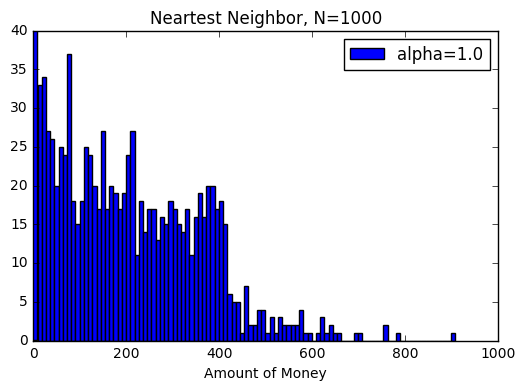

In [35]:
plt.hist(trial_17, bins=100, label='alpha=1.0')
plt.legend(loc="upper right")
plt.title("Neartest Neighbor, N=1000")
plt.xlabel("Amount of Money")

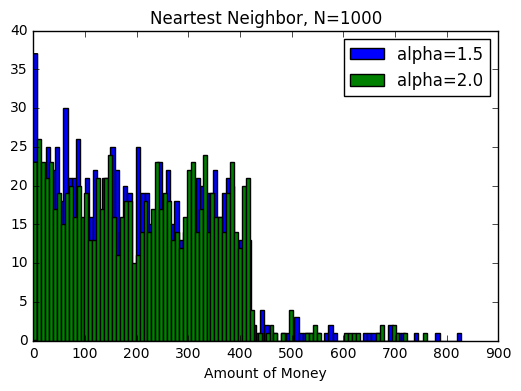

In [36]:
plt.hist(trial_18, bins=100, label='alpha=1.5')
plt.hist(trial_19, bins=100, label='alpha=2.0')
plt.legend(loc="upper right")
plt.title("Neartest Neighbor, N=1000")
plt.xlabel("Amount of Money")

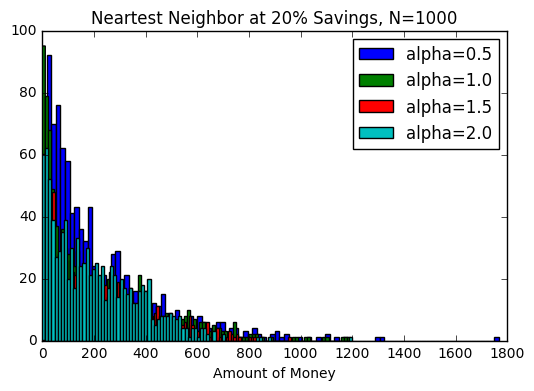

In [37]:
trial_20 = tr_nearest_save(agents_diff(1000,420),100000,0.2,0.5)
trial_21 = tr_nearest_save(agents_diff(1000,420),100000,0.2,1.0)
trial_22 = tr_nearest_save(agents_diff(1000,420),100000,0.2,1.5)
trial_23 = tr_nearest_save(agents_diff(1000,420),100000,0.2,2.0)
plt.hist(trial_20, bins=100, label='alpha=0.5')
plt.hist(trial_21, bins=100, label='alpha=1.0')
plt.hist(trial_22, bins=100, label='alpha=1.5')
plt.hist(trial_23, bins=100, label='alpha=2.0')
plt.legend(loc='upper right')
plt.title("Neartest Neighbor at 20% Savings, N=1000")
plt.xlabel("Amount of Money")

In [38]:
def tr_nearest_prev(agent_array, tr_num,a,gamma):
    c_i_j = np.zeros((len(agent_array)-1, len(agent_array)-1))
    #print(c_i_j)
    people = copy.copy(agent_array)
    current = 1
    while current <= tr_num:
        i,j = random.sample(range(0, len(agent_array)-1),2)
        #print(i,j)
        m_i = people[i]
        m_j = people[j]
        #print(m_i,m_j)
        total_m = m_i + m_j
        diff = m_i-m_j
        if diff==0:
            diff = 1
        abs_diff = abs(diff)
        prob = 1/(abs_diff**(a))*(c_i_j[i][j]+1)**gamma
        user_set = random.uniform(0,1)
        current += 1
        c_i_j[i][j]+=1
        #print(prob)
        if prob>=user_set:
            epsilon = random.uniform(0,1)
            if people[i]>0 and people[j]>0:
                people[i] = epsilon*total_m
                people[j] = (1-epsilon)*total_m
            else:
                continue
        else:
            continue
        
    #print(total_money_begin, total_money_end)
    return people

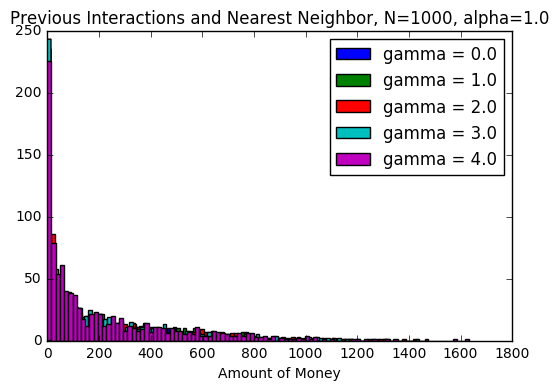

In [47]:
trial_24 = tr_nearest_prev(agents_diff(1000,420),100000,1,0.0)
trial_25 = tr_nearest_prev(agents_diff(1000,420),100000,1,1.0)
trial_26 = tr_nearest_prev(agents_diff(1000,420),100000,1,2.0)
trial_27 = tr_nearest_prev(agents_diff(1000,420),100000,1,3.0)
trial_28 = tr_nearest_prev(agents_diff(1000,420),100000,1,4.0)
plt.hist(trial_24, bins=100, label='gamma = 0.0')
plt.hist(trial_25, bins=100, label='gamma = 1.0')
plt.hist(trial_26, bins=100, label='gamma = 2.0')
plt.hist(trial_27, bins=100, label='gamma = 3.0')
plt.hist(trial_28, bins=100, label='gamma = 4.0')
plt.legend(loc='upper right')
plt.title("Previous Interactions and Nearest Neighbor, N=1000, alpha=1.0")
plt.xlabel("Amount of Money")

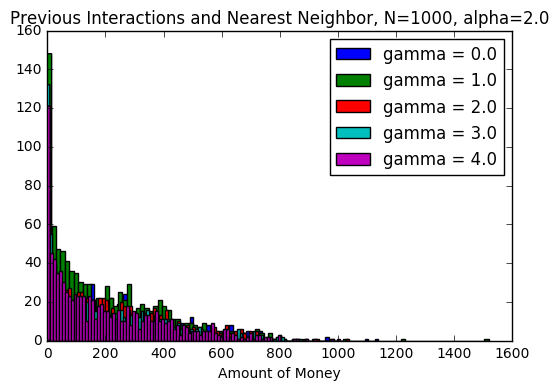

In [40]:
trial_29 = tr_nearest_prev(agents_diff(1000,420),100000,2.0,0.0)
trial_30 = tr_nearest_prev(agents_diff(1000,420),100000,2.0,1.0)
trial_31 = tr_nearest_prev(agents_diff(1000,420),100000,2.0,2.0)
trial_32 = tr_nearest_prev(agents_diff(1000,420),100000,2.0,3.0)
trial_33 = tr_nearest_prev(agents_diff(1000,420),100000,2.0,4.0)
plt.hist(trial_29, bins=100, label='gamma = 0.0')
plt.hist(trial_30, bins=100, label='gamma = 1.0')
plt.hist(trial_31, bins=100, label='gamma = 2.0')
plt.hist(trial_32, bins=100, label='gamma = 3.0')
plt.hist(trial_33, bins=100, label='gamma = 4.0')
plt.legend(loc='upper right')
plt.title("Previous Interactions and Nearest Neighbor, N=1000, alpha=2.0")
plt.xlabel("Amount of Money")

In [41]:
def prev_ver(agent_array, tr_num,a,gamma):
    c_i_j = np.zeros((len(agent_array)-1, len(agent_array)-1))
    people = copy.copy(agent_array)
    current = 1
    while current <= tr_num:
        i,j = random.sample(range(0, len(agent_array)-1),2)
        '''
        #print(i,j)
        m_i = people[i]
        m_j = people[j]
        #print(m_i,m_j)
        total_m = m_i + m_j
        diff = m_i-m_j
        if diff==0:
            diff = 1
        abs_diff = abs(diff)
        prob = 1/(abs_diff**(a))*(c_i_j[i][j]+1)**gamma
        user_set = random.uniform(0,1)
        '''
        current += 1
        c_i_j[i][j]+=1
        '''
        #print(prob)
        if prob>=user_set:
            epsilon = random.uniform(0,1)
            if people[i]>0 and people[j]>0:
                people[i] = epsilon*total_m
                people[j] = (1-epsilon)*total_m
            else:
                continue
        else:
            continue
        '''
        
    #print(total_money_begin, total_money_end)
    return c_i_j

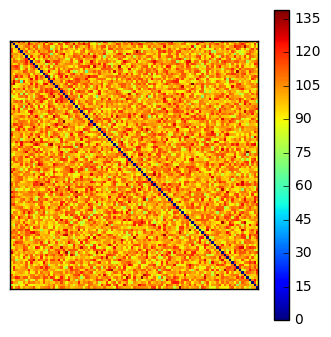

In [42]:
test_prev = prev_ver(agents_diff(100,420),1000000,2.0,1.0)
test_prev
myplot = plt.matshow(test_prev)
myplot.axes.get_xaxis().set_visible(False)
myplot.axes.get_yaxis().set_visible(False)
plt.colorbar()

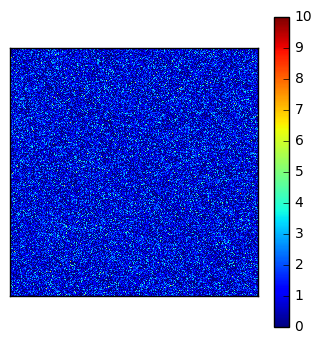

In [43]:
test_prev = prev_ver(agents_diff(1000,420),1000000,2.0,1.0)
test_prev
myplot = plt.matshow(test_prev)
myplot.axes.get_xaxis().set_visible(False)
myplot.axes.get_yaxis().set_visible(False)
plt.colorbar()